## Importamos librerías

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score

### importamos los datos

In [ ]:
data = '/content/creditcard.csv'
df = pd.read_csv(data)
df.drop('Time', axis=1, inplace=True)#borramos el Time porque no lo usaremos para este analisis.
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# Análisis exploratorio de datos

In [ ]:
# 1. conteo y porcentaje
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Conteo de casos')
print('--------------------------------------------')
print('Total de clases {}'.format(cases))
print('cantidad de clases no fraudulentas {}'.format(nonfraud_count))
print('cantidad de clases fraudulentas {}'.format(fraud_count))
print('Porcentaje de fraudes {}'.format(fraud_percentage))

Conteo de casos
--------------------------------------------
Total de clases 166510
cantidad de clases no fraudulentas 166151
cantidad de clases fraudulentas 358
Porcentaje de fraudes 0.22


In [ ]:
#Descripción
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('ESTADÍSTICAS DE CANTIDAD DE CASOS')
print('--------------------------------------------')
print('ESTADÍSTICAS DE CANTIDAD DE CASOS SIN FRAUDE')
print(nonfraud_cases.Amount.describe())
print('--------------------------------------------')
print('ESTADÍSTICAS DE CANTIDAD DE CASOS DE FRAUDE')
print(fraud_cases.Amount.describe())

ESTADÍSTICAS DE CANTIDAD DE CASOS
--------------------------------------------
ESTADÍSTICAS DE CANTIDAD DE CASOS SIN FRAUDE
count    166151.000000
mean         86.859640
std         243.333364
min           0.000000
25%           5.400000
50%          21.500000
75%          76.070000
max       19656.530000
Name: Amount, dtype: float64
--------------------------------------------
ESTADÍSTICAS DE CANTIDAD DE CASOS DE FRAUDE
count     358.000000
mean      111.608492
std       227.944683
min         0.000000
25%         1.000000
50%        10.685000
75%       101.500000
max      1809.680000
Name: Amount, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166510 entries, 0 to 166509
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      166510 non-null  float64
 1   V2      166510 non-null  float64
 2   V3      166510 non-null  float64
 3   V4      166510 non-null  float64
 4   V5      166510 non-null  float64
 5   V6      166510 non-null  float64
 6   V7      166510 non-null  float64
 7   V8      166509 non-null  float64
 8   V9      166509 non-null  float64
 9   V10     166509 non-null  float64
 10  V11     166509 non-null  float64
 11  V12     166509 non-null  float64
 12  V13     166509 non-null  float64
 13  V14     166509 non-null  float64
 14  V15     166509 non-null  float64
 15  V16     166509 non-null  float64
 16  V17     166509 non-null  float64
 17  V18     166509 non-null  float64
 18  V19     166509 non-null  float64
 19  V20     166509 non-null  float64
 20  V21     166509 non-null  float64
 21  V22     16

In [ ]:
np.any(np.isnan(df))

True

In [ ]:
df.shape

(166510, 30)

In [ ]:
df_cl = df.dropna(how='any')
df_cl.shape

(166509, 30)

In [ ]:
# Escalada
# vamos a escalar los datos ya que la variable Amount varia mucho en comparacion de las demás features.

sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(10)) 

0    0.257733
1   -0.346165
2    1.199112
3    0.150377
4   -0.069555
5   -0.342137
6   -0.336712
7   -0.189529
8    0.025841
9   -0.342096
Name: Amount, dtype: float64


## División de datos

In [ ]:
X = df_cl.drop('Class', axis = 1).values
y = df_cl['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train samples : '), X_train[:1])
print('X_test samples : '), X_test[0:1])
print('y_train samples : '), y_train[0:20])
print('y_test samples : '), y_test[0:20])

X_train samples :  [[-1.7872621  -1.27280824  1.99286834 -1.91838267  0.81481363 -0.93110482
  -0.7898485   0.24697407  0.33811282 -0.37685243  1.34211167 -2.96671288
   1.13539804  1.16380841 -1.67037689  1.68033305  0.32847377 -0.42946107
   0.25216688  0.60989105 -0.07565627 -0.55935788  0.11248141 -0.45825043
   0.49358877 -0.46593759  0.1609064   0.12686032 -0.07773385]]
X_test samples :  [[-0.37634487  1.08429381  0.23076579 -0.64733246  1.48767596 -0.1577508
   0.8744291  -0.03238589  0.62654161 -1.41339635  1.49001878 -2.31385737
   1.37895627  0.71939793 -1.56897034  0.55413083  0.77048145  0.77819724
   0.23194822 -0.06640475 -0.41149435 -0.99708404 -0.13827902  0.03663299
  -0.24373414  0.12994297  0.03134436  0.14087735 -0.35356315]]
y_train samples :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test samples :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Modelado

In [ ]:
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [ ]:
# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [ ]:
# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [ ]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

## evaluación

In [ ]:
#Accuracy score

print('ACCURACY SCORE')
print('------------------------------------------------------------------------')
print('Accuracy score de Decision Tree model {}'.format(accuracy_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score de KNN model {}'.format(accuracy_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score de Logistic Regression model {}'.format(accuracy_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score de SVM model {}'.format(accuracy_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score de Random Forest Tree model {}'.format(accuracy_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score de XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score de Decision Tree model 0.9991892378836106
------------------------------------------------------------------------
Accuracy score de KNN model 0.9993393790162753
------------------------------------------------------------------------
Accuracy score de Logistic Regression model 0.9986187015794847
------------------------------------------------------------------------
Accuracy score de SVM model 0.9992492943366765
------------------------------------------------------------------------
Accuracy score de Random Forest Tree model 0.9991892378836106
------------------------------------------------------------------------
Accuracy score de XGBoost model is 0.9993994354693412


In [ ]:
# F1 score

print('F1 SCORE')
print('------------------------------------------------------------------------')
print('F1 score de Decision Tree model {}'.format(f1_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('F1 score de KNN model {}'.format(f1_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('F1 score de Logistic Regression model {}'.format(f1_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('F1 score de SVM model {}'.format(f1_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('F1 score de Random Forest Tree model {}'.format(f1_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('F1 score de XGBoost model {}'.format(f1_score(y_test, xgb_yhat)))

F1 SCORE
------------------------------------------------------------------------
F1 score de Decision Tree model 0.8258064516129032
------------------------------------------------------------------------
F1 score de KNN model 0.842857142857143
------------------------------------------------------------------------
F1 score de Logistic Regression model 0.6349206349206349
------------------------------------------------------------------------
F1 score de SVM model 0.8175182481751825
------------------------------------------------------------------------
F1 score de Random Forest Tree model 0.8
------------------------------------------------------------------------
F1 score de XGBoost model 0.8611111111111112


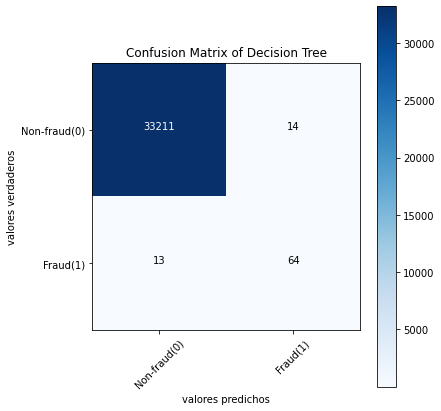

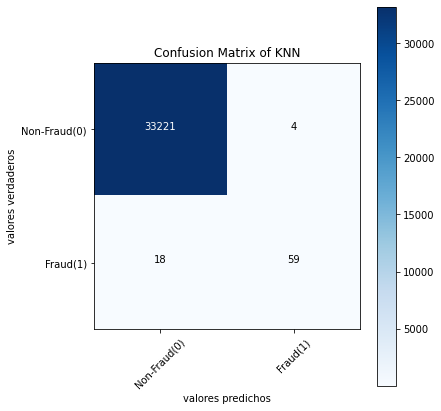

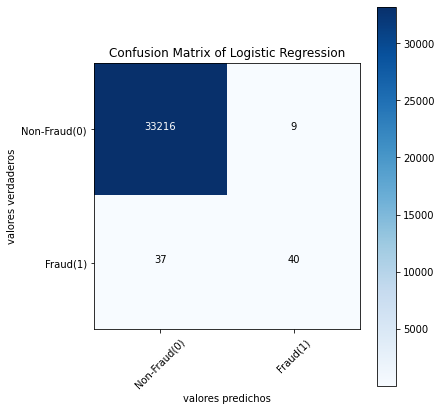

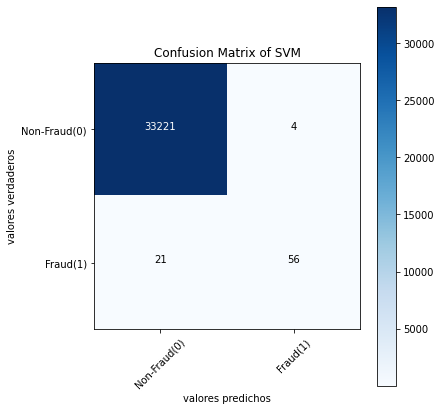

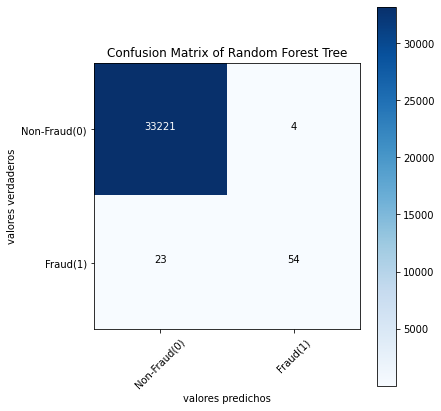

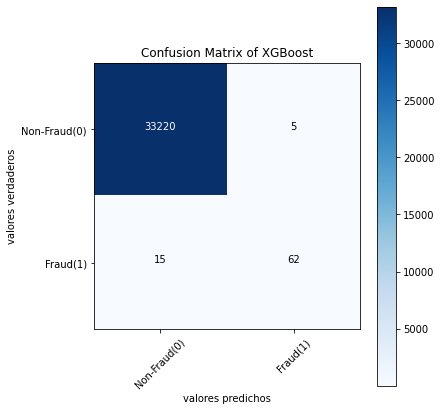

In [ ]:
# Confusion Matrix

# Definimos una función para el plot

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('valores verdaderos')
    plt.xlabel('valores predichos')

# Calcular la matriz de confusión para los modelos.

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) 
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) 
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) 
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) 

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

Comprender los resultados de la matriz de confusión: Tomemos como ejemplo la matriz de confusión del modelo XGBoost. La primera fila es para transacciones cuyo valor de fraude real en el conjunto de prueba es 0. Como puede calcular, el valor de fraude 33225 de ellas es 0. Y de estas 33225 transacciones que no son de fraude, el clasificador predijo correctamente 33220 de ellas como 0 y 5 de ellos como 1. Esto significa que, para 33220 transacciones no fraudulentas, el valor real de abandono fue 0 en el conjunto de prueba, y el clasificador también predijo correctamente esos como 0. Podemos decir que nuestro modelo ha clasificado las transacciones no fraudulentas transacciones bastante bien.